# **`` Mushrooms DATASET (les champignons)``**


## **``Colonnes principales (features)``** :


| *Nom de la colonne*      | *Signification*                                                        |
| -------------------------- | ------------------------------------------------------------------------ |
| class                    | Type du champignon : e = comestible, p = poison (toxique)            |
| cap-shape                | Forme du chapeau (b = en forme de cloche, c = convexe...)            |
| cap-surface              | Surface du chapeau (f = fibreuse, g = rainurée, y = écailleuse...) |
| cap-color                | Couleur du chapeau (n = marron, y = jaune, w = blanc...)           |
| bruises                  | Présence de meurtrissures (t = oui, f = non)                         |
| odor                     | Odeur (a = amande, l = anisé, n = aucun, f = fétide...)          |
| gill-attachment          | Attachement des lamelles (a = attachées, f = libres...)              |
| gill-spacing             | Espacement des lamelles (c = rapprochées, w = larges)                |
| gill-size                | Taille des lamelles (b = larges, n = étroites)                       |
| gill-color               | Couleur des lamelles (k = noire, n = brune, g = grise...)          |
| stalk-shape              | Forme du pied (e = épaissi à la base, t = effilé)                    |
| stalk-root               | Type de racine du pied (b, c, u, e, ou ? = inconnu)            |
| stalk-surface-above-ring | Surface du pied au-dessus de l'anneau (s, k, f, y)               |
| stalk-surface-below-ring | Surface du pied sous l'anneau (s, k, f, y)                       |
| stalk-color-above-ring   | Couleur du pied au-dessus de l'anneau                                    |
| stalk-color-below-ring   | Couleur du pied sous l'anneau                                            |
| veil-type                | Type de voile (toujours p, donc sans importance ici)                   |
| veil-color               | Couleur du voile                                                         |
| ring-number              | Nombre d’anneaux (n = aucun, o = un, t = deux)                     |
| ring-type                | Type d’anneau (e = évanescent, l = large, n = aucun...)            |
| spore-print-color        | Couleur de l’empreinte de spores (k = noire, n = brune...)           |
| population               | Taille de la population dans laquelle il pousse (s, n, a...)       |
| habitat                  | Habitat (u = urbain, g = gazon, m = prairie, d = bois...)        |

In [102]:
data['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

## **`` L'importation des bibliothèques : ``**


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

In [101]:
data=pd.read_csv('mushrooms.csv')

In [64]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
data.shape

(8124, 23)

In [66]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# ``Data Cleaning :``

## ``1. valeurs doubles ``


In [68]:
data.duplicated().sum()


0

## ``2. valeurs manquants ``


In [69]:
data.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# ``Data Analyse :``


### la distribution des classes (p: poison, e: edible) :


In [70]:
data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

### la forme de chapeau (cap-shape) la plus courante parmi les champignons comestibles :


In [71]:
data[data['class']=='e']['cap-shape'].value_counts().idxmax()

'x'

### la couleur de chapeau (cap-color) la plus courante parmi les champignons vénéneux :

In [72]:
data[data['class']=='p']['cap-color'].value_counts().idxmax()

'n'

### la fréquence de chaque type d'anneau (ring-type) parmi les champignons :


In [73]:
data.groupby('class')['ring-type'].value_counts()

class  ring-type
e      p            3152
       e            1008
       f              48
p      e            1768
       l            1296
       p             816
       n              36
Name: count, dtype: int64

### l'habitat (habitat) le plus fréquent pour les champignons comestibles :

In [74]:
data[data['class']=='e']['habitat'].value_counts().idxmax()


'd'

### la relation entre la couleur des lamelles (gill-color) et la classe des champignons 


In [75]:
data.groupby('class')['gill-color'].value_counts()

class  gill-color
e      w              956
       n              936
       p              852
       u              444
       k              344
       g              248
       h              204
       e               96
       o               64
       y               64
p      b             1728
       p              640
       h              528
       g              504
       w              246
       n              112
       k               64
       u               48
       r               24
       y               22
Name: count, dtype: int64

### la variation des couleurs du pied (stalk-color) entre les champignons


In [76]:
data.groupby('class')['stalk-color-below-ring'].value_counts()

class  stalk-color-below-ring
e      w                         2704
       g                          576
       p                          576
       o                          192
       e                           96
       n                           64
p      w                         1680
       p                         1296
       n                          448
       b                          432
       c                           36
       y                           24
Name: count, dtype: int64

### La répartition des population (population) des champignons (solitaire, groupée, etc.)


In [77]:
data['population'].value_counts()

population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64

### la proportion de champignons avec des bleus (bruises) parmi les comestibles et les vénéneux


In [78]:
data[data['bruises']=='t']['class'].value_counts()

class
e    2752
p     624
Name: count, dtype: int64

### la variation des types de voile (veil-type) entre les classes 


In [79]:
data.groupby('class')['veil-type'].value_counts()

class  veil-type
e      p            4208
p      p            3916
Name: count, dtype: int64

# ``Visualisation de data :``


- **visualisation avec histogrammes**


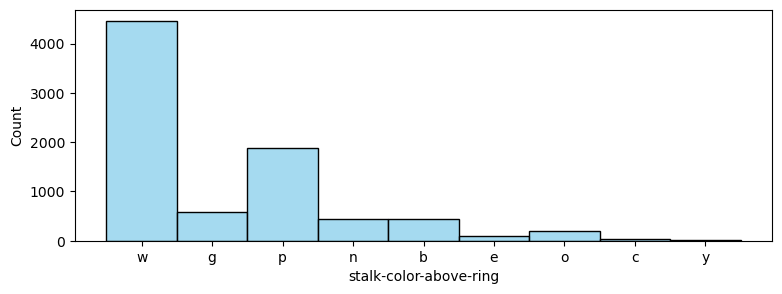

In [80]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["stalk-color-above-ring"],color = "skyblue")
plt.show()

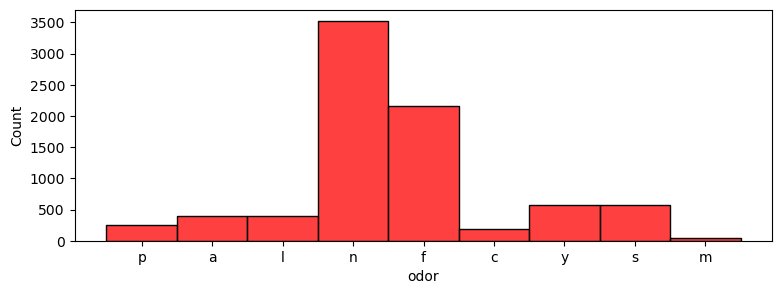

In [81]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["odor"],color = "red")
plt.show()

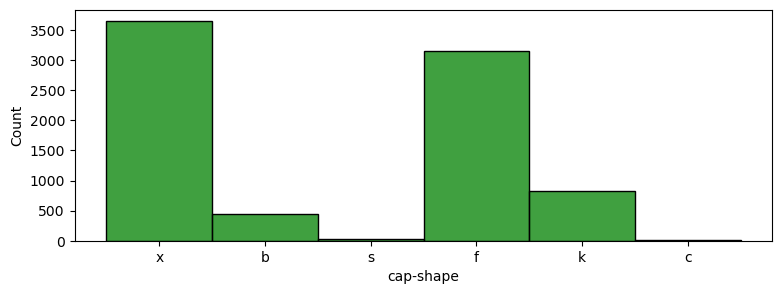

In [82]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["cap-shape"],color = "green")
plt.show()

- **Visualisation avec diagrammes**


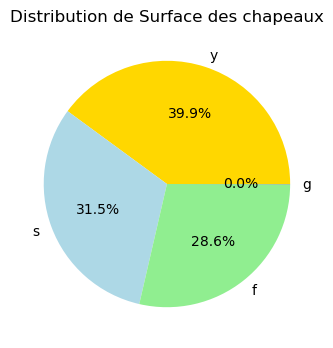

In [83]:
plt.figure(figsize=(9, 4))

bp_counts = data['cap-surface'].value_counts()
plt.pie(bp_counts, labels=bp_counts.index,colors=['gold', 'lightblue', 'lightgreen', 'gray'],autopct='%1.1f%%')
plt.title('Distribution de Surface des chapeaux')

plt.show()

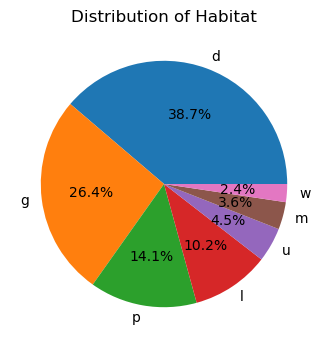

In [84]:
plt.figure(figsize=(9, 4))

bp_counts = data['habitat'].value_counts()
plt.pie(bp_counts, labels=bp_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Habitat')

plt.show()

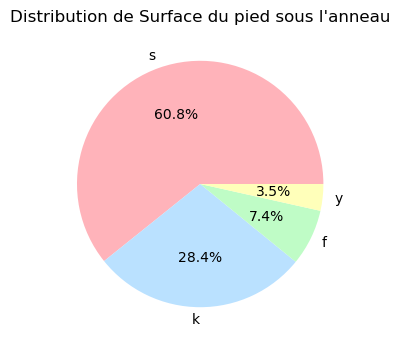

In [85]:
plt.figure(figsize=(9, 4))

bp_counts = data['stalk-surface-below-ring'].value_counts()
plt.pie(bp_counts, labels=bp_counts.index,colors = ['#FFB3BA', '#BAE1FF', '#BFFCC6', '#FFFFBA'],autopct='%1.1f%%')
plt.title("Distribution de Surface du pied sous l'anneau")

plt.show()

###  la relation entre la présence de bleus (bruises) et la classe des champignons 

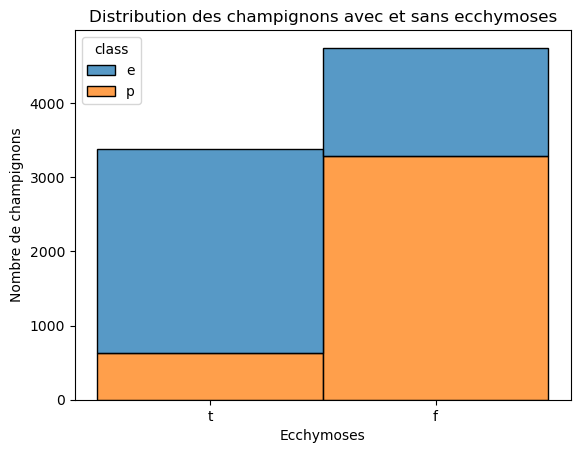

In [86]:
bruises_class = data.groupby('class')['bruises'].value_counts().reset_index(name='count')

sns.histplot(data=bruises_class, x='bruises', hue='class', weights='count', multiple='stack')
plt.title('Distribution des champignons avec et sans ecchymoses')
plt.xlabel('Ecchymoses')
plt.ylabel('Nombre de champignons')
plt.show()

### Comparison entre la taille des lamelles (gill-size) et les classes

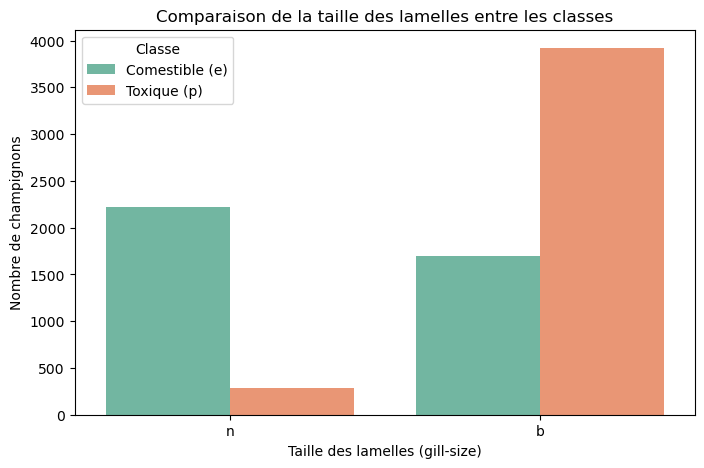

In [87]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='gill-size', hue='class', palette='Set2')
plt.title('Comparaison de la taille des lamelles entre les classes')
plt.xlabel('Taille des lamelles (gill-size)')
plt.ylabel('Nombre de champignons')
plt.legend(title='Classe', labels=['Comestible (e)', 'Toxique (p)'])
plt.show()

### Fréquence de chaque type d'anneau (ring-type) parmi les champignons

C:\Users\ACH\AppData\Local\Temp\ipykernel_60868\2736512093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='ring-type', palette='Set3')


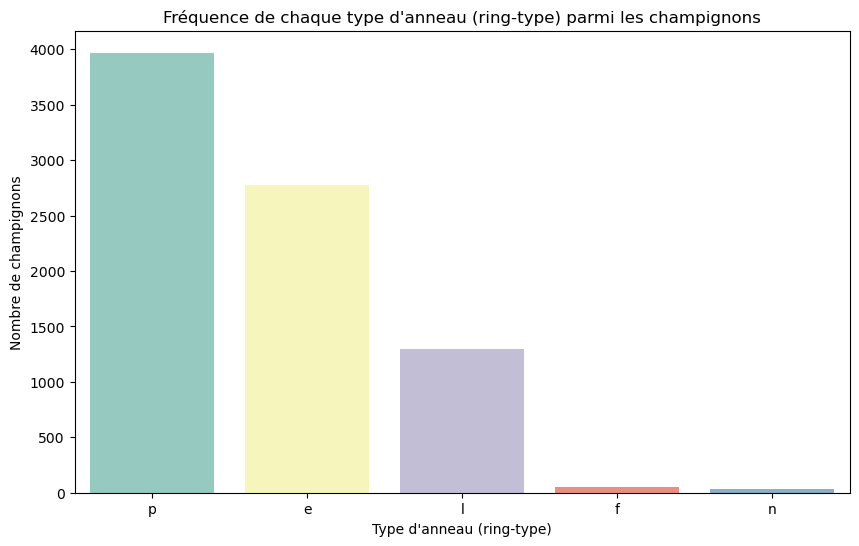

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='ring-type', palette='Set3')
plt.title("Fréquence de chaque type d'anneau (ring-type) parmi les champignons")
plt.xlabel("Type d'anneau (ring-type)")
plt.ylabel('Nombre de champignons')
plt.show()

### La Répartition des habitats pour les champignons 

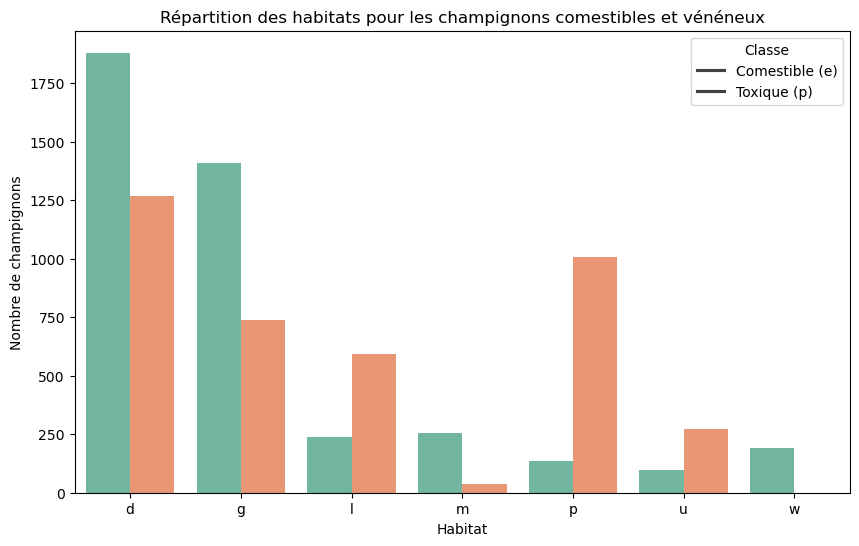

In [89]:
habitat_distribution = data.groupby(['class', 'habitat']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))

# Création d'un graphique en barres empilées
sns.barplot(data=habitat_distribution, x='habitat', y='count', hue='class', palette='Set2')

# Ajout des titres et des labels
plt.title('Répartition des habitats pour les champignons comestibles et vénéneux')
plt.xlabel('Habitat')
plt.ylabel('Nombre de champignons')
plt.legend(title='Classe', labels=['Comestible (e)', 'Toxique (p)'])

plt.show()

# ``Data Preparation :``


## ``1. Transformation des variable categoricale  ``


In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols_to_encode = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

for col in cols_to_encode:
    data[col] = le.fit_transform(data[col])

In [ ]:
encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le  # stocker l'encodeur pour chaque colonne

['e' 'p']


In [105]:
print(encoders['cap-shape'].classes_)

['b' 'c' 'f' 'k' 's' 'x']


In [91]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,p,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,p,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,p,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,p,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,p,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,p,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,p,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,p,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,p,2,1,0,7,4,2


## ``2. Selection des features ``


In [93]:
X = data.drop(columns=['class','veil-type'])
y = data['class']

## **``3. separation des donnees ``**


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
X_train.shape, y_train.shape


((6499, 21), (6499,))

In [96]:
X_test.shape, y_test.shape


((1625, 21), (1625,))

In [99]:
data['cap-shape'].unique()

array([5, 0, 4, 2, 3, 1])

# ``Machine Learning :``


## **``1. Modele de Regression Logistic :``**


### **Entraînement du modèle**


In [143]:
from sklearn.linear_model import LogisticRegression
# Initialisation et entraînement du modèle
Logistic = LogisticRegression(fit_intercept=True, C=1, penalty='l2', solver='newton-cg', random_state=42)
Logistic.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_Logistic = Logistic.predict(X_test)


### **Évaluation du modèle**


Accuracy: 0.95
F1 Score: 0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



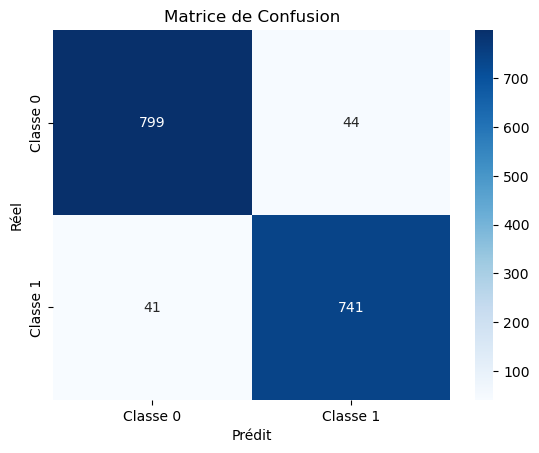

In [144]:
# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred_Logistic)
print(f"Accuracy: {accuracy:.2f}")

# F1-score du modèle
f1 = f1_score(y_test, y_pred_Logistic)
print(f"F1 Score: {f1:.2f}")

print(classification_report(y_test, y_pred_Logistic))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_Logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


### **la courbe ROC**


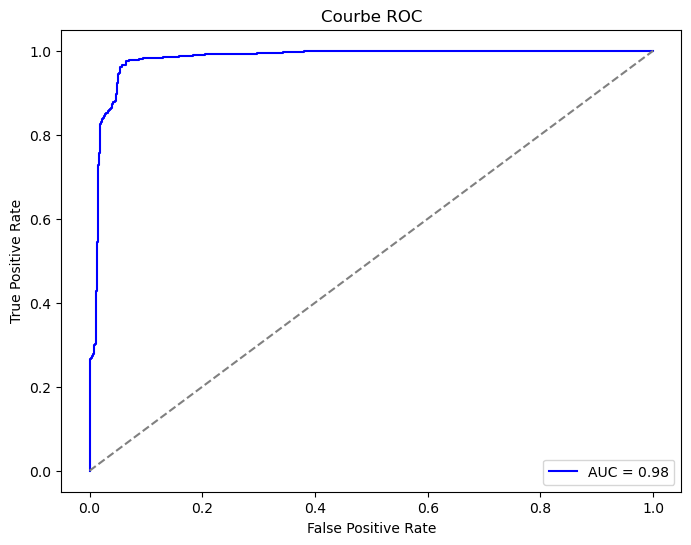

In [145]:

# Calcul de la courbe ROC
y_scores = Logistic.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()


## **``2. KNN``**


### **Entraînement du modèle**

In [146]:
from sklearn.neighbors import KNeighborsClassifier
# Création et entraînement du modèle KNN Regression avec K=5
knn = KNeighborsClassifier( metric='manhattan' ,n_neighbors=9, weights='distance', algorithm='ball_tree')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=9,
                     weights='distance')

### **Évaluation du modèle**


In [147]:
# Prédictions sur les données de test
y_pred_knn = knn.predict(X_test)

# Calcul de l'accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Précision du modèle KNN: {accuracy_knn:.2f}")

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred_knn))
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_knn)

Précision du modèle KNN: 1.00
Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### **la courbe ROC**


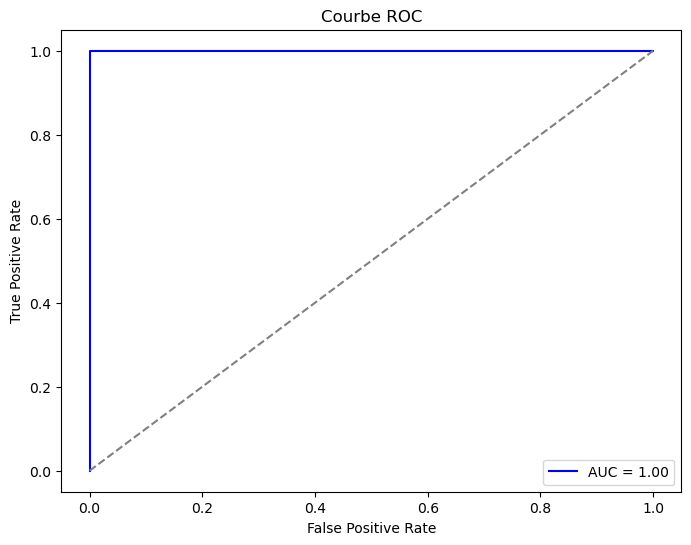

In [148]:

# Calcul de la courbe ROC
y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()


## **``3. Decision Tree``**


### **Entraînement du modèle**


In [149]:
from sklearn.tree import DecisionTreeClassifier 

TRee = DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=42, min_samples_split=10)

### **Évaluation du modèle**


Accuracy: 1.00
F1 Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



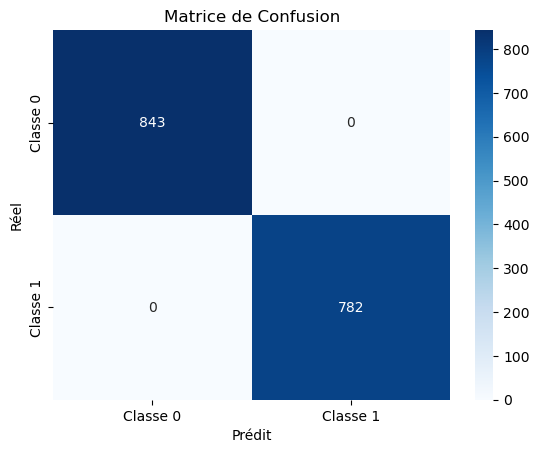

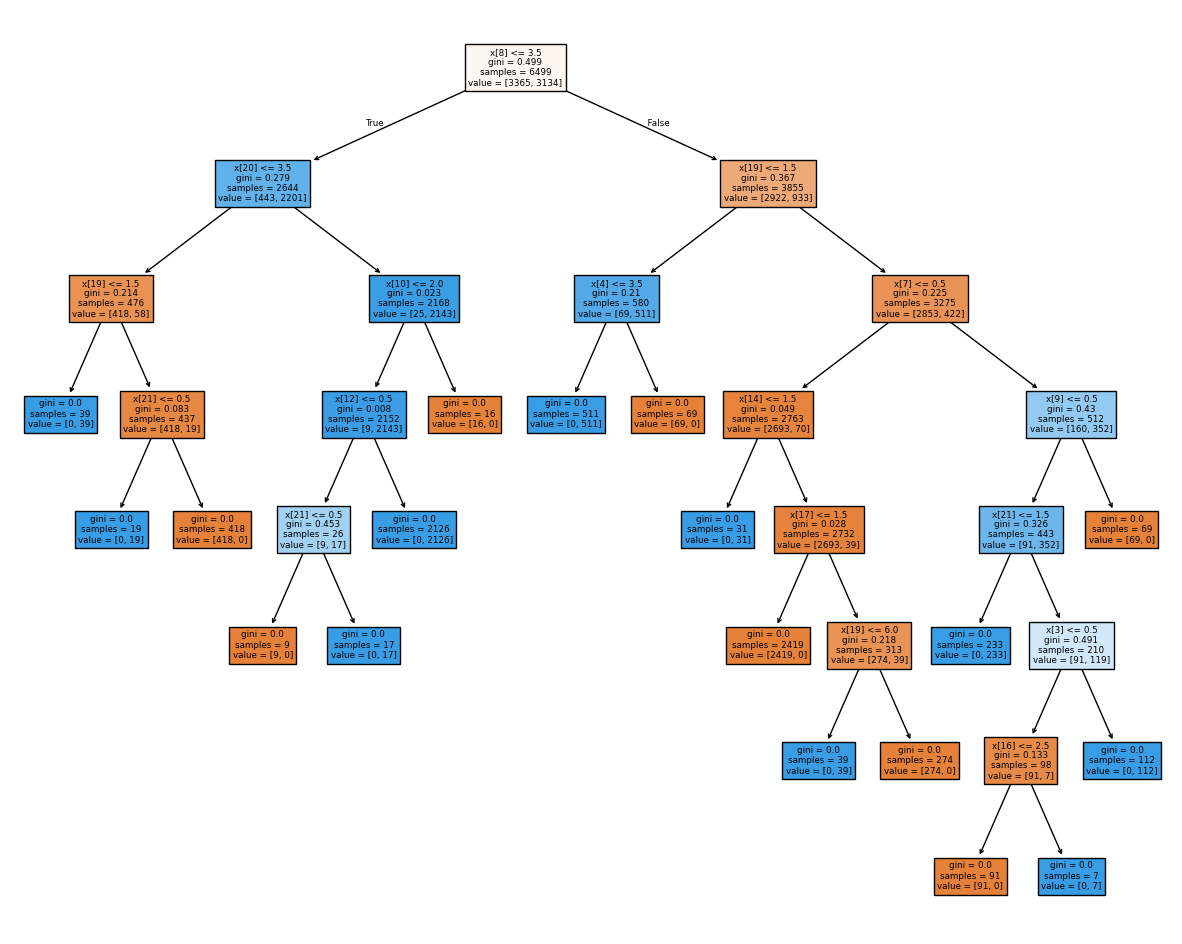

In [150]:
from sklearn.tree import plot_tree

TRee.fit(X_train, y_train)
y_pred_tree = TRee.predict(X_test)

# Accuracy du modèle
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2f}")

# F1-score du modèle
f1 = f1_score(y_test, y_pred_tree)
print(f"F1 Score: {f1:.2f}")


print(classification_report(y_test, y_pred_tree))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

plt.figure(figsize=(15,12))
plot_tree(TRee , filled=True)
plt.show()

### **la courbe ROC**


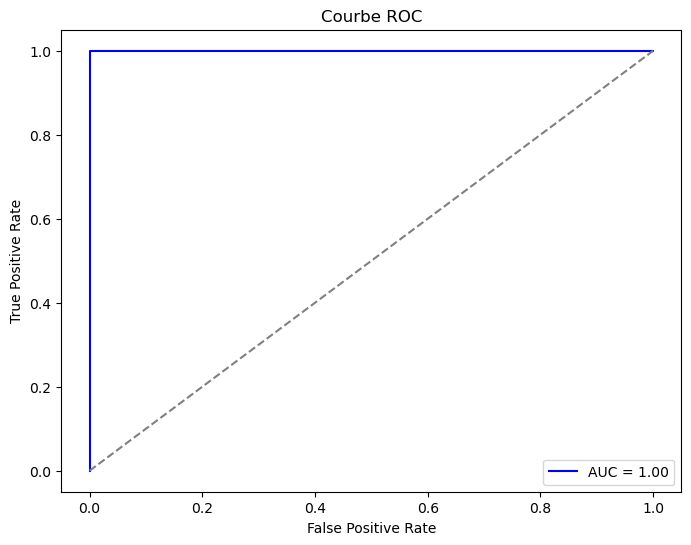

In [151]:

# Calcul de la courbe ROC
y_scores = TRee.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()


## **``4. Random Forest``**


### **Entraînement du modèle**


In [152]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(n_estimators=125,criterion="gini",max_depth=70,random_state=42)
random.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, n_estimators=125, random_state=42)

### **Évaluation du modèle**


Précision du modèle Random Forest : 1.00
Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



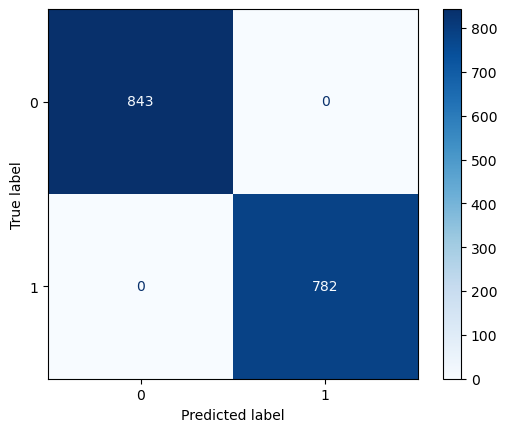

In [153]:
# Prédictions
y_pred_random = random.predict(X_test)

# Évaluation
accuracy_RF = accuracy_score(y_test, y_pred_random)
print(f"Précision du modèle Random Forest : {accuracy_RF:.2f}")

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred_random))

# Affichage de la matrice de confusion
ConfusionMatrixDisplay.from_estimator(random, X_test, y_test, cmap='Blues')
plt.show()

### **la courbe ROC**


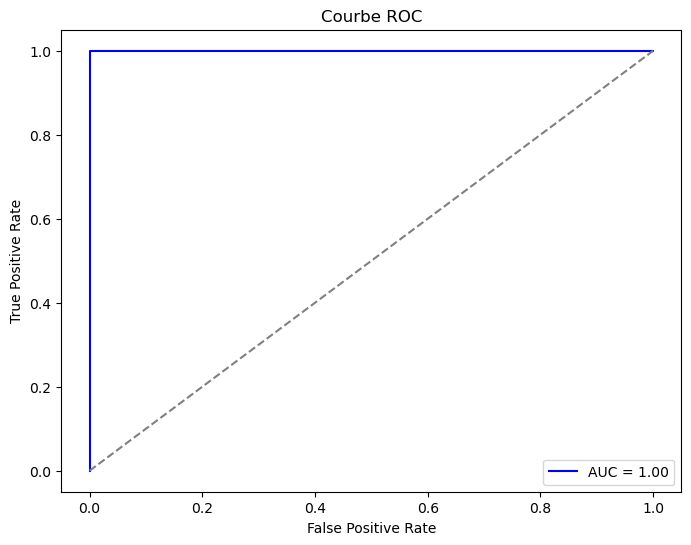

In [154]:

# Calcul de la courbe ROC
y_scores = random.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()


## **``5. SVM``**


### **Entraînement du modèle**


In [155]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel="rbf", C=1.0)
svm_classifier.fit(X_train, y_train)

SVC()

### **Évaluation du modèle**


Précision du modèle : 0.99

Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



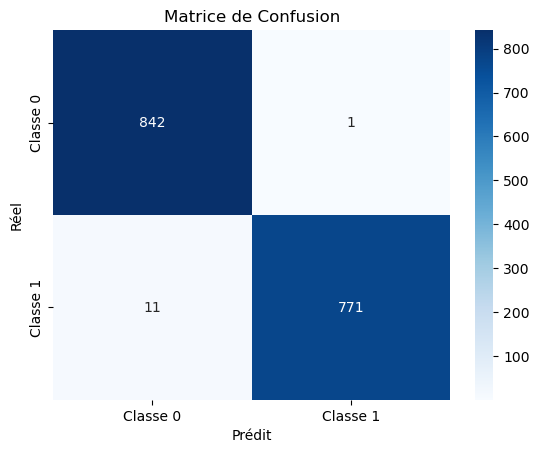

In [156]:
# Prédiction sur les données test
y_pred_svm = svm_classifier.predict(X_test)

# Évaluation du modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Précision du modèle : {accuracy_svm:.2f}")
print("\nRapport de classification :\n"
, classification_report(y_test, y_pred_svm))

conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

# **`` Conclusion ``**


## **``1. L'accuracy :``**


In [157]:
print(f"L'accuracy du logistic regression : {accuracy:.2f}")
print(f"L'accuracy du modèle decision tree : {accuracy_tree:.2f}")
print(f"L'accuracy du modèle SVM : {accuracy_svm:.2f}")
print(f"L'accuracy du modèle KNN : {accuracy_knn:.2f}")
print(f"L'accuracy du modèle Random Forest : {accuracy_RF:.2f}")

L'accuracy du logistic regression : 0.95
L'accuracy du modèle decision tree : 1.00
L'accuracy du modèle SVM : 0.99
L'accuracy du modèle KNN : 1.00
L'accuracy du modèle Random Forest : 1.00


## **``2. Rapport de classification :``**


In [158]:
from sklearn.metrics import classification_report

# Rapport de classification pour Logistic Regression
print("Rapport de classification : Logistic Regression")
print(classification_report(y_test, y_pred_Logistic))

# Rapport de classification pour KNN
print("\nRapport de classification : KNN")
print(classification_report(y_test, y_pred_knn))

# Rapport de classification pour Decision Tree
print("\nRapport de classification : Decision Tree")
print(classification_report(y_test, y_pred_tree))

# Rapport de classification pour Random Forest
print("\nRapport de classification : Random Forest")
print(classification_report(y_test, y_pred_random))

# Rapport de classification pour SVM
print("\nRapport de classification : SVM")
print(classification_report(y_test, y_pred_svm))

Rapport de classification : Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625


Rapport de classification : KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Rapport de classification : Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   m

## **``3. Matrice de Confusion :``**


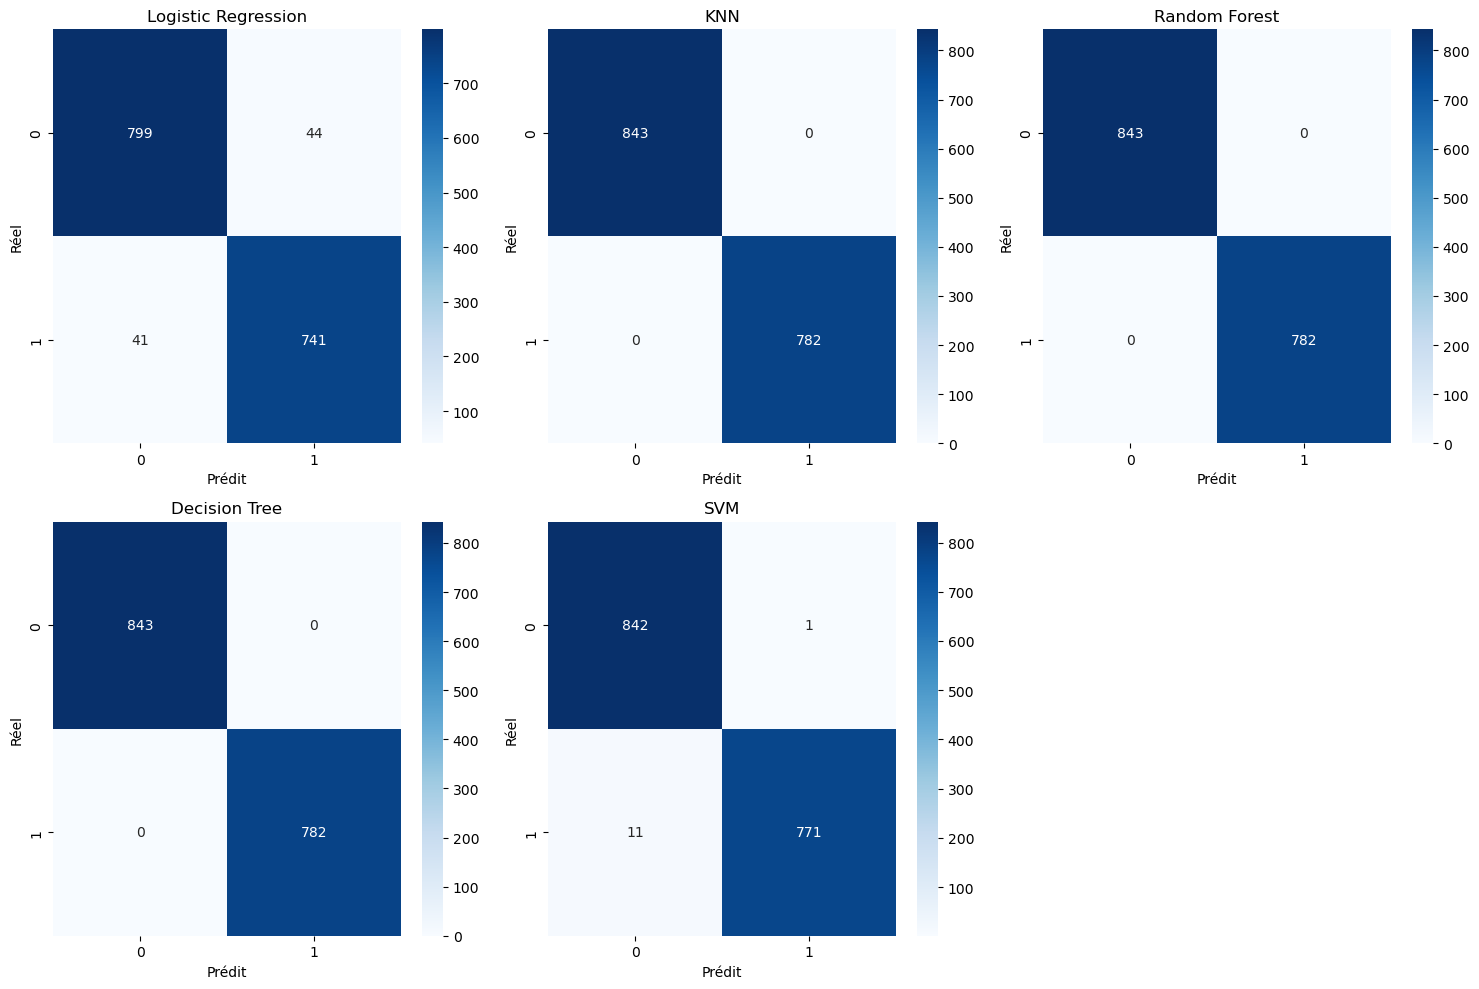

In [159]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_Logistic), annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Prédit')
axes[0, 0].set_ylabel('Réel')

# KNN
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('KNN')
axes[0, 1].set_xlabel('Prédit')
axes[0, 1].set_ylabel('Réel')

# Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_random), annot=True, fmt='d', cmap='Blues', ax=axes[0, 2])
axes[0, 2].set_title('Random Forest')
axes[0, 2].set_xlabel('Prédit')
axes[0, 2].set_ylabel('Réel')

# Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Decision Tree')
axes[1, 0].set_xlabel('Prédit')
axes[1, 0].set_ylabel('Réel')

# SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('SVM')
axes[1, 1].set_xlabel('Prédit')
axes[1, 1].set_ylabel('Réel')

# Remove the last empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

## **``4. la courbe ROC :``**


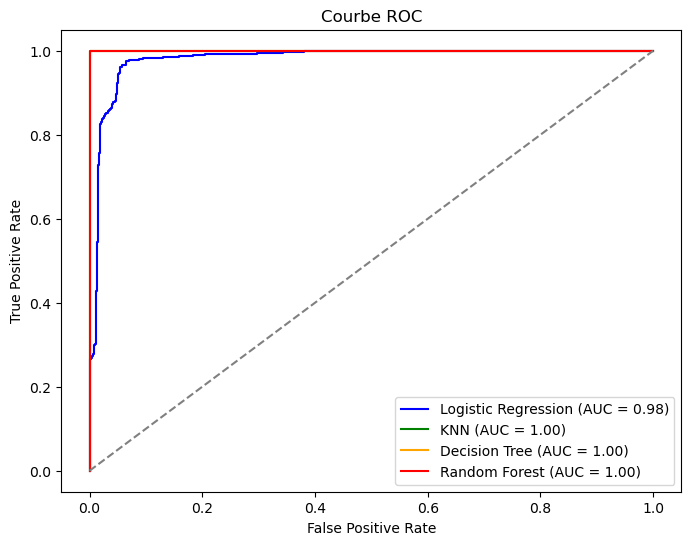

In [160]:

# Calcul de la courbe ROC
y_scores = Logistic.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc_logistic = auc(fpr, tpr)

y_scores = knn.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_scores)
roc_auc_knn = auc(fpr1, tpr1)

y_scores = TRee.predict_proba(X_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, y_scores)
roc_auc_tree = auc(fpr2, tpr2)

y_scores = random.predict_proba(X_test)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, y_scores)
roc_auc_rf = auc(fpr3, tpr3)


# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})', color='blue')
plt.plot(fpr1, tpr1, label=f'KNN (AUC = {roc_auc_knn:.2f})', color='green')
plt.plot(fpr2, tpr2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})', color='orange')
plt.plot(fpr3, tpr3, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()


#  `` Prediction ``


In [162]:
Mes_Donnes = [[5, 2, 4, 1, 6, 1, 0, 1, 4, 3, 1, 3, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5]]
y_pred = random.predict(Mes_Donnes)
print("Prédiction pour Mes_Donnes : ", y_pred)

Prédiction pour Mes_Donnes :  [1]


c:\Users\ACH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [161]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# ``L'enregistreemnt de modele``


In [ ]:
import pickle
# Enregistrement du modèle
# with open('random_forest_model.pkl', 'wb') as file:
#     pickle.dump(random, file)

In [164]:
# Chargement du modèle
with open('random_forest_model.pkl', 'rb') as file:
    load_model = pickle.load(file)

#  `` Prediction avec le modele enregistrer :``


In [165]:
Mes_Donnes = [[5, 2, 4, 1, 6, 1, 0, 1, 4, 3, 1, 3, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5]]

y_nouv = load_model.predict(Mes_Donnes)
print("Prédiction pour Mes_Donnes : ", y_nouv)

Prédiction pour Mes_Donnes :  [1]


c:\Users\ACH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## `` Conclusion Finale :``


In [166]:
print(f"Le meilleur resultats du modèle est de Random Forest : {accuracy_RF:.2f}")
print(f"Le meilleur resultats du ROC est de random forest aussi: {roc_auc_rf:.2f}")
print(f"nombres des features utilisé dans les applications est  : {X_train.shape[1]}")
print(f"les features utilisé  sont : {X.columns.tolist()}")

Le meilleur resultats du modèle est de Random Forest : 1.00
Le meilleur resultats du ROC est de random forest aussi: 1.00
nombres des features utilisé dans les applications est  : 22
les features utilisé  sont : ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


# ``Le déploiement de modele``


https://github.com/medyassch/Projet_champignons